In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [170]:
df = pd.read_csv('Sales_Data_Final.csv')

**Data Exploration**

In [171]:
df.head()

,customer_id,purchase_date,product_id,amount_spent,price_per_item,number_of_items
0,CUST_0055,2023-08-14,PROD_034,196,98,2
1,CUST_0031,2023-11-20,PROD_041,30,6,5
2,CUST_0023,2023-10-29,PROD_024,147,49,3
3,CUST_0053,2023-12-03,PROD_041,18,6,3
4,CUST_0048,2023-08-14,PROD_033,93,93,1


In [172]:
df.dtypes

customer_id        object
purchase_date      object
product_id         object
amount_spent        int64
price_per_item      int64
number_of_items     int64
dtype: object

In [173]:
df['customer_id'] = df['customer_id'].astype('str')
df['product_id'] = df['product_id'].astype('str')
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['amount_spent'] = df['amount_spent'].astype('float')
df['price_per_item'] = df['price_per_item'].astype('float')

In [174]:
df.dtypes

customer_id                object
purchase_date      datetime64[ns]
product_id                 object
amount_spent              float64
price_per_item            float64
number_of_items             int64
dtype: object

In [305]:
df.describe()

,purchase_date,amount_spent,price_per_item,number_of_items
count,1000,1000.000000,1000.00000,1000.000000
mean,2023-07-04 08:52:48.000000256,146.603000,48.62400,3.037000
min,2023-01-01 00:00:00,6.000000,6.00000,1.000000
25%,2023-04-01 00:00:00,56.000000,28.00000,2.000000
50%,2023-07-04 12:00:00,116.000000,46.00000,3.000000
75%,2023-10-05 00:00:00,204.000000,72.00000,4.000000
max,2023-12-31 00:00:00,490.000000,98.00000,5.000000
std,NaN,113.359657,27.70708,1.416205


In [175]:
top_products = df.groupby('product_id')['amount_spent'].sum().sort_values(ascending=False).head(10)

In [176]:
top_products

product_id
PROD_005    6555.0
PROD_038    6160.0
PROD_010    6090.0
PROD_013    5888.0
PROD_036    5328.0
PROD_040    5170.0
PROD_007    5073.0
PROD_035    4958.0
PROD_003    4617.0
PROD_009    4602.0
Name: amount_spent, dtype: float64

<ipython-input-284-7c07fc43e117>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)


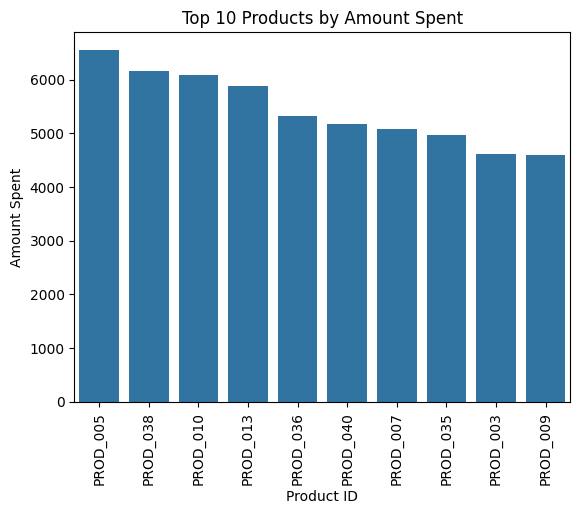

In [284]:
barplot = sns.barplot(x=top_products.index, y=top_products.values)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Amount Spent')
plt.title('Top 10 Products by Amount Spent')
plt.show()

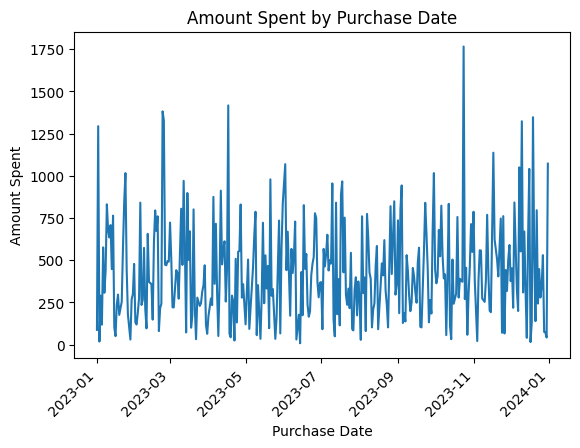

In [178]:
df.groupby('purchase_date').sum()['amount_spent'].plot()
plt.xlabel('Purchase Date')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by Purchase Date')
plt.xticks(rotation=45)
plt.show()

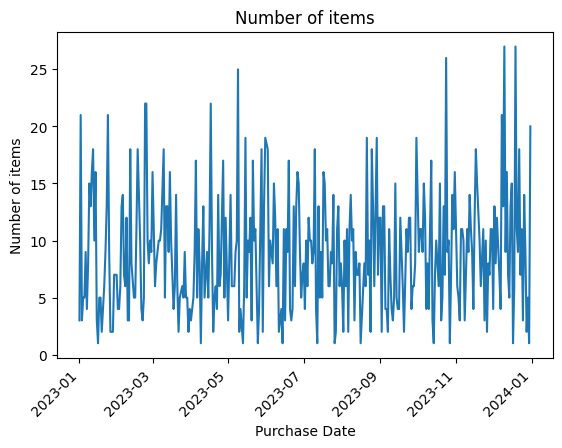

In [304]:
df.groupby('purchase_date').sum()['number_of_items'].plot()
plt.xlabel('Purchase Date')
plt.ylabel('Number of items')
plt.title('Number of items')
plt.xticks(rotation=45)
plt.show()

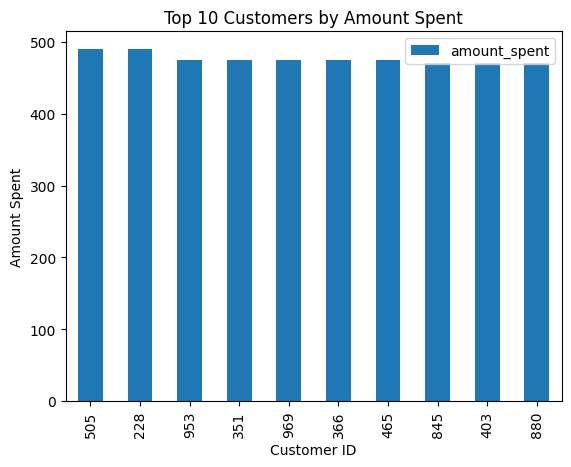

In [179]:
df.sort_values(by='amount_spent',ascending=False).head(10)[['amount_spent']].plot(kind='bar')
plt.xlabel('Customer ID')
plt.ylabel('Amount Spent')
plt.title('Top 10 Customers by Amount Spent')
plt.show()

Data Preprocessing

In [201]:
df.head()

,customer_id,purchase_date,product_id,amount_spent,price_per_item,number_of_items
0,CUST_0055,2023-08-14,PROD_034,196.0,98.0,2
1,CUST_0031,2023-11-20,PROD_041,30.0,6.0,5
2,CUST_0023,2023-10-29,PROD_024,147.0,49.0,3
3,CUST_0053,2023-12-03,PROD_041,18.0,6.0,3
4,CUST_0048,2023-08-14,PROD_033,93.0,93.0,1


In [290]:
df3 = df.drop(columns=['customer_id','price_per_item','amount_spent'],axis=1)

In [291]:
df3.head()

,purchase_date,product_id,number_of_items
0,2023-08-14,PROD_034,2
1,2023-11-20,PROD_041,5
2,2023-10-29,PROD_024,3
3,2023-12-03,PROD_041,3
4,2023-08-14,PROD_033,1


In [227]:
# Extract features from purchase_date
df3['day_of_week'] = df3['purchase_date'].dt.dayofweek
df3['month'] = df3['purchase_date'].dt.month
df3['week_of_year'] = df3['purchase_date'].dt.isocalendar().week

In [228]:
df3.head()

,purchase_date,product_id,number_of_items,day_of_week,month,week_of_year
0,2023-08-14,PROD_034,2,0,8,33
1,2023-11-20,PROD_041,5,0,11,47
2,2023-10-29,PROD_024,3,6,10,43
3,2023-12-03,PROD_041,3,6,12,48
4,2023-08-14,PROD_033,1,0,8,33


In [229]:
y = df3['number_of_items']
X = df3.drop(columns=['number_of_items'],axis=1)

In [230]:
# Encode product_id using one-hot encoding
X = pd.get_dummies(X, columns=['product_id'])

In [231]:
X = X.drop(columns=['purchase_date'],axis=1)

In [232]:
X.head()

,day_of_week,month,week_of_year,product_id_PROD_001,product_id_PROD_002,product_id_PROD_003,product_id_PROD_004,product_id_PROD_005,product_id_PROD_006,product_id_PROD_007,...,product_id_PROD_041,product_id_PROD_042,product_id_PROD_043,product_id_PROD_044,product_id_PROD_045,product_id_PROD_046,product_id_PROD_047,product_id_PROD_048,product_id_PROD_049,product_id_PROD_050
0,0,8,33,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,11,47,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,6,10,43,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6,12,48,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,0,8,33,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
model = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

Mean Absolute Error: 1.3180015135116576


In [234]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 1.513668888325056


In [242]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
print(feature_importance_df.sort_values(by='importance', ascending=False))

                feature  importance
2          week_of_year    0.342364
0           day_of_week    0.177466
1                 month    0.052774
10  product_id_PROD_008    0.031072
43  product_id_PROD_041    0.027810
20  product_id_PROD_018    0.025668
44  product_id_PROD_042    0.023318
5   product_id_PROD_003    0.020962
9   product_id_PROD_007    0.017024
37  product_id_PROD_035    0.016359
48  product_id_PROD_046    0.016218
24  product_id_PROD_022    0.015743
49  product_id_PROD_047    0.014469
15  product_id_PROD_013    0.011697
33  product_id_PROD_031    0.011296
26  product_id_PROD_024    0.011055
39  product_id_PROD_037    0.010066
7   product_id_PROD_005    0.009955
16  product_id_PROD_014    0.009349
41  product_id_PROD_039    0.009224
17  product_id_PROD_015    0.008070
45  product_id_PROD_043    0.007812
31  product_id_PROD_029    0.007626
3   product_id_PROD_001    0.007312
52  product_id_PROD_050    0.006949
30  product_id_PROD_028    0.006470
35  product_id_PROD_033    0

In [273]:
#For new input - For a particular Day
def preprocess_input(purchase_date, product_id):
    input_data = pd.DataFrame({
        'purchase_date': [pd.to_datetime(purchase_date)],
        'product_id': [product_id]
    })
    input_data['day_of_week'] = input_data['purchase_date'].dt.dayofweek
    input_data['month'] = input_data['purchase_date'].dt.month
    input_data['week_of_year'] = input_data['purchase_date'].dt.isocalendar().week
    input_data = input_data.drop(columns=['purchase_date'])
    input_data = pd.get_dummies(input_data, columns=['product_id'])
    input_data = input_data.reindex(columns=X_train.columns, fill_value=0)
    return input_data

future_date = '2023-11-11'
all_product_ids = X.columns[X.columns.str.startswith('product_id_')].str.replace('product_id_', '').tolist()

predicted_sales = []
for product_id in all_product_ids:
    new_input_data = preprocess_input(future_date, product_id)
    prediction = model.predict(new_input_data)
    predicted_sales.append({'product_id': product_id, 'predicted_number_of_items': prediction[0]})

predicted_sales_df = pd.DataFrame(predicted_sales)

In [275]:
def round_items(num):
    if num - int(num) <= 0.5:
        return int(num)
    else:
        return int(num) + 1

predicted_sales_df['predicted_number_of_items'] = predicted_sales_df['predicted_number_of_items'].apply(round_items)

In [276]:
print(predicted_sales_df)

   product_id  predicted_number_of_items
0    PROD_001                          3
1    PROD_002                          3
2    PROD_003                          3
3    PROD_004                          3
4    PROD_005                          3
5    PROD_006                          3
6    PROD_007                          3
7    PROD_008                          3
8    PROD_009                          3
9    PROD_010                          3
10   PROD_011                          3
11   PROD_012                          3
12   PROD_013                          3
13   PROD_014                          3
14   PROD_015                          3
15   PROD_016                          3
16   PROD_017                          3
17   PROD_018                          3
18   PROD_019                          3
19   PROD_020                          3
20   PROD_021                          3
21   PROD_022                          3
22   PROD_023                          3
23   PROD_024   

In [295]:
#Purchase dates from June 20, 2024, to July 30, 2024
date_range = pd.date_range(start='2024-06-20', end='2024-07-30')


product_ids = ['PROD_005', 'PROD_038', 'PROD_008']  # product IDs as needed


predicted_sales = []
for product_id in product_ids:
    for purchase_date in date_range:
        new_input_data = preprocess_input(purchase_date, product_id)
        prediction = model.predict(new_input_data)
        predicted_sales.append({'product_id': product_id, 'purchase_date': purchase_date, 'predicted_number_of_items': prediction[0]})

predicted_sales_df = pd.DataFrame(predicted_sales)

In [297]:
predicted_sales_df['predicted_number_of_items'] = predicted_sales_df['predicted_number_of_items'].apply(round_items)

print(predicted_sales_df)

    product_id purchase_date  predicted_number_of_items
0     PROD_005    2024-06-20                          3
1     PROD_005    2024-06-21                          3
2     PROD_005    2024-06-22                          3
3     PROD_005    2024-06-23                          3
4     PROD_005    2024-06-24                          3
..         ...           ...                        ...
118   PROD_008    2024-07-26                          3
119   PROD_008    2024-07-27                          3
120   PROD_008    2024-07-28                          3
121   PROD_008    2024-07-29                          2
122   PROD_008    2024-07-30                          2

[123 rows x 3 columns]


In [300]:
# Forecast all products for the month of July
future_dates = pd.date_range(start='2023-07-01', end='2023-07-31')

all_product_ids = X.columns[X.columns.str.startswith('product_id_')].str.replace('product_id_', '').tolist()

predicted_sales = []
for product_id in all_product_ids:
    total_items = 0
    for future_date in future_dates:
        new_input_data = preprocess_input(future_date, product_id)
        prediction = model.predict(new_input_data)
        total_items += round_items(prediction[0])
    predicted_sales.append({'product_id': product_id, 'predicted_number_of_items': total_items})

predicted_sales_df = pd.DataFrame(predicted_sales)
print(predicted_sales_df)


   product_id  predicted_number_of_items
0    PROD_001                         93
1    PROD_002                         93
2    PROD_003                         91
3    PROD_004                         93
4    PROD_005                         93
5    PROD_006                         93
6    PROD_007                         91
7    PROD_008                         82
8    PROD_009                         93
9    PROD_010                         93
10   PROD_011                         93
11   PROD_012                         93
12   PROD_013                         93
13   PROD_014                         93
14   PROD_015                         93
15   PROD_016                         93
16   PROD_017                         93
17   PROD_018                         93
18   PROD_019                         93
19   PROD_020                         93
20   PROD_021                         93
21   PROD_022                         93
22   PROD_023                         93
23   PROD_024   

In [302]:
"""Results from Random Forest was not satisfactory even after grid search and finding the best parameters"""

'Results from Random Forest was not satisfactory even after grid search and finding the best parameters'

In [303]:
"""Therefore switched to XGboost"""

'Therefore switched to XGboost'